___
# SIMULADO 2

## 2023 - 2o. semestre 

___


## NOME: Coloque seu nome AQUI!

In [1295]:
# %matplotlib inline
import math
from math import sqrt

import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from IPython.display import display  # Para ter melhor print.

# Pode trazer mais bibliotecas, caso julgue interessante!!

<div id="indice"></div>

## Índice

1. [Pergunta 1](#p1)

1. [Pergunta 2](#p2)

1. [Pergunta 3](#p3)

1. [Pergunta 4](#p4)

1. [Pergunta 5](#p5)

1. [Pergunta 6](#p5)

<div id="abrindo-arquivo"></div>

___

**Abrindo um arquivo de dados e visualizando seu conteúdo:**


In [1296]:
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
c:\Users\PH\Desktop\Repositorios\cdados



In [1297]:
filename = 'df_simulado2.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}. Lembre-se que precisa estar na mesma pasta do arquivo notebook')

Parece que o arquivo df_simulado2.xlsx está na mesma pasta do notebook, yay!


Abrindo a base de dados:

In [1298]:
df = pd.read_excel(filename)

Avaliando as 3 primeiras linhas da base de dados:

In [1299]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1382
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1405
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1441


Avaliando o tipo de cada variável disponível no *dataframe* `df`:

[Voltar ao Índice](#indice)

___
<div id="p1"></div>

## PERGUNTA 1: 
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [1300]:
# Coloque seu código aqui!
df.loc[:, ['job_title']].value_counts().to_frame().head(5)

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16


[Voltar ao Índice](#indice)

In [1301]:
df.loc[:, ['job_title']].value_counts(normalize=True).to_frame().head(5)

,proportion
job_title,
Data Scientist,0.235585
Data Engineer,0.217463
Data Analyst,0.159802
Machine Learning Engineer,0.067545
Research Scientist,0.026359


___
<div id="p2"></div>

## PERGUNTA 2:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [1302]:
# Coloque seu código aqui!
df2021_fulltime = df.loc[(df.work_year == 2021) & (df.employment_type == "FT"), :]

[Voltar ao Índice](#indice)

In [1303]:
paises = list(df2021_fulltime.loc[:, ['company_location']].value_counts().head(5).keys())
for i, j in enumerate(paises):
    paises[i] = j[0]

In [1304]:
salario = df.loc[(df.company_location.isin(paises)) & (df.employment_type == "FT"), :].salary_in_usd
print(round(salario.mean(), 4), round(salario.min(), 4), round(salario.std(), 4), round(salario.median(), 4), round(salario.quantile(q=0.4), 4))

126644.5021 5679 68604.7854 117789.0 104095.4


___
<div id="p3"></div>

## PERGUNTA 3:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [1305]:
# Coloque seu código aqui!
tabela = pd.crosstab(df.company_size, df.remote_ratio, normalize='all', margins=True)
tabela

remote_ratio,0,50,100,All
company_size,,,,
L,0.052718,0.098847,0.174629,0.326194
M,0.130148,0.034596,0.372323,0.537068
S,0.026359,0.029654,0.080725,0.136738
All,0.209226,0.163097,0.627677,1.000000


In [1306]:
P100dL = tabela[100]['L']/tabela['All']['L']
round(P100dL, 4)

0.5354

In [1307]:
round(tabela[50]['M'], 4)

0.0346

[Voltar ao Índice](#indice)

<div id="p4"></div>

## PERGUNTA 4:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [1308]:
# Coloque seu código aqui!
US = df.loc[df.employee_residence == 'US', :]
US

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1182
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,1473
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,1573
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L,1148
13,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L,1493
...,...,...,...,...,...,...,...,...,...,...,...,...
599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M,1331
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,1223
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,1201
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,1121


In [1309]:
round(US.monthly_expensies.corr(US.salary_in_usd), 4)

0.031

[Voltar ao Índice](#indice)

<div id="p5"></div>

## PERGUNTA 5:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [1310]:
# Coloque seu código aqui!
nUS = df.loc[df.company_location != 'US', :]
nUS

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1382
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1405
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1441
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,987
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,1498
...,...,...,...,...,...,...,...,...,...,...,...,...
531,2022,MI,FT,Data Analyst,75000,USD,75000,CA,0,CA,M,1439
567,2022,MI,FT,Data Analyst,50000,GBP,65438,GB,0,GB,M,1204
586,2022,MI,FT,Data Analyst,35000,GBP,45807,GB,0,GB,M,1172
600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M,1102


In [1311]:
nUS['salary_in_10kusd'] = nUS.salary_in_usd/10000

C:\Users\PH\AppData\Local\Temp\ipykernel_7332\3815165277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nUS['salary_in_10kusd'] = nUS.salary_in_usd/10000


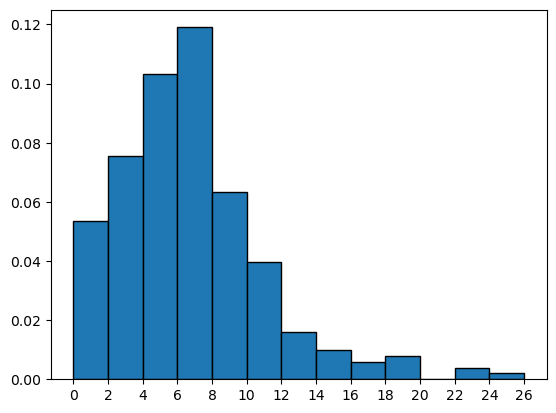

In [1312]:
plt.hist(nUS.salary_in_10kusd, density=True, bins=arange(0, 27, 2), edgecolor="black")
plt.xticks(arange(0, 27, 2))
plt.show()

[Voltar ao Índice](#indice)

<div id="p6"></div>

## PERGUNTA 6:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [1313]:
# Coloque seu código aqui!
df2020 = df.loc[df.work_year == 2020, :]
df2020

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1382
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1405
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1441
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,987
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1182
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020,SE,FT,Data Science Manager,190200,USD,190200,US,100,US,M,1474
68,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,1301
69,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,0,AT,S,1170
70,2020,MI,FT,Data Scientist,55000,EUR,62726,FR,50,LU,S,1267


In [1314]:
df2020.loc[df2020.remote_ratio == 0, :].salary.describe()

count    1.500000e+01
mean     3.819467e+05
std      7.527916e+05
min      2.000000e+04
25%      4.450000e+04
50%      9.800000e+04
75%      3.745000e+05
max      3.000000e+06
Name: salary, dtype: float64

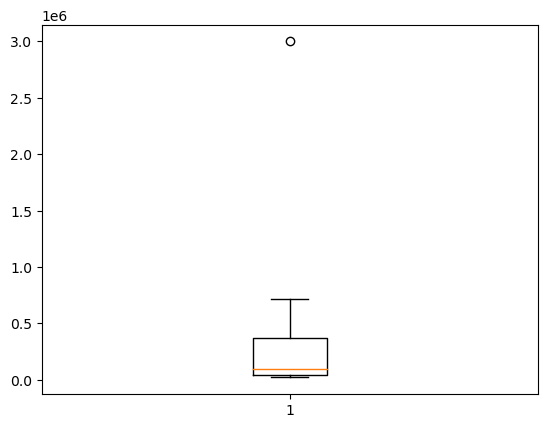

In [1315]:
plt.boxplot(df2020.loc[df2020.remote_ratio == 0, :].salary)
plt.show()

In [1316]:
df2020.loc[df2020.remote_ratio == 50, :].salary.describe()

count    2.100000e+01
mean     6.282619e+05
std      2.378661e+06
min      8.000000e+03
25%      4.200000e+04
50%      7.000000e+04
75%      1.500000e+05
max      1.100000e+07
Name: salary, dtype: float64

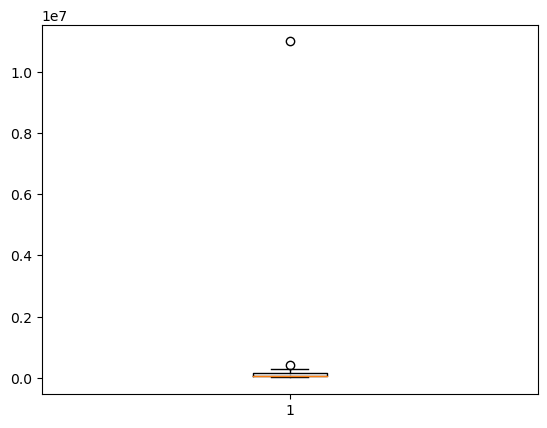

In [1317]:
plt.boxplot(df2020.loc[df2020.remote_ratio == 50, :].salary)
plt.show()

In [1318]:
df2020.loc[df2020.remote_ratio == 100, :].salary.describe()

count    3.600000e+01
mean     2.391419e+05
std      7.283401e+05
min      1.000000e+04
25%      6.000000e+04
50%      1.015000e+05
75%      1.357500e+05
max      4.450000e+06
Name: salary, dtype: float64

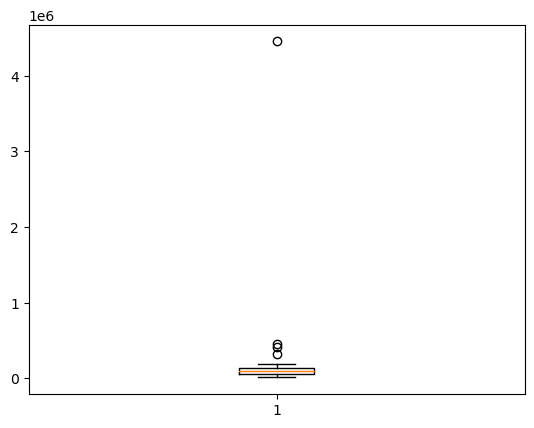

In [1319]:
plt.boxplot(df2020.loc[df2020.remote_ratio == 100, :].salary)
plt.show()

[Voltar ao Índice](#indice)